# ⚡ Grupo 6 - UTEC 4Geeks BID 2022 ⚡
# PROYECTO FINAL

# Stroke Prediction 

Stroke happens when the blood supply to part of the brain is cut off. Without blood, brain cells can be damaged or die. Fast access to treatment saves lives and improves recovery.

There are many factors, including tobacco use, physical inactivity, unhealthy diet, harmful use of alcohol, atrial fibrillation, raised blood lipid levels, obesity, genetic disposition, stress and depression.

Stroke has already reached epidemic proportions. 1 in 4 of us will have a stroke in our lifetime. 

Ref: https://www.world-stroke.org/

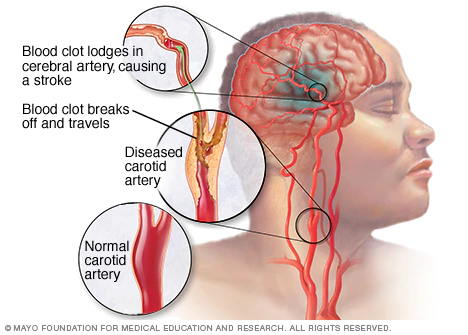

**In Uruguay**, stroke has a fundamental epidemiological importance: it is among the three leading causes of death at a general level and it is the leading cause of disability in adults. According to data published by the Commission for Cardiovascular Health, around 80 million people living in the world today have suffered a stroke and, consequently, more than 50 million survivors live with some type of permanent disability. Although life after a stroke is not the same in many cases, it is possible, with the right care and support, to continue with a good quality of life. CVAs are time-dependent, which means that it is essential to identify them as quickly as possible in order to establish the most appropriate treatment for the patient and prevent possible sequelae; they constitute one of the leading causes of disease burden worldwide and in Uruguay, measured in years of healthy life lost, an indicator that encompasses both mortality and disability caused by these diseases.

According to the latest data from the Ministry of Public Health, from December 2019, during 2018, 1,732 people died from stroke and 2,125 people from cerebrovascular causes in general. (https://um.edu.uy/noticias/el-acv-es-una-enfermedad-con-alta-incidencia-en-uruguay-y-el-mundo)


 
Stroke, a cerebrovascular disease, is one of the major causes of death. It causes significant health and financial burdens for both patients and health care systems. One of the important risk factors for stroke is health-related behavior, which is becoming an increasingly important focus of prevention. Many machine learning models have been built to predict the risk of stroke or to automatically diagnose stroke, using predictors such as lifestyle factors or radiological imaging. (Alanazi EM, Abdou A, Luo J. Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models. JMIR Form Res. 2021 Dec 2;5(12):e23440. doi: 10.2196/23440. PMID: 34860663; PMCID: PMC8686476.)

**Our model it's about screen healthy patients to know the degree of probability of suffering a stroke or not suffering it to work on a personalized prevention plan**


### Metadata
- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

The information was downloaded from the Kaggle site.
 https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset because we did not find Uruguayan public data about stroke.

**Studying the data dictionary our first conclusions is:
Contains some of the preconditions recognized worldwide as causes of the disease.**





In [144]:
!pip install --upgrade pip
!pip install pandas numpy seaborn plotly
!pip install sklearn
!pip install statsmodels
!pip install imblearn
!pip install pygal

# Import Library and modules


In [263]:
# Step 0. 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder 
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import NearMiss
from collections import Counter


import scipy.stats as stats
import warnings
sns.set(style='darkgrid', context='notebook')

In [264]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [265]:
sns.set(rc={'figure.figsize': (16, 8)})
plt.style.use('fivethirtyeight')

In [146]:
# para usar en drive
#from google.colab import drive
#drive.mount('/content/drive')

# Load the dataset




In [261]:
# Step 1. Load the dataset 
df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')

In [ ]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

In [262]:
df_raw

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [149]:
#usamos este en el drive compartido
#df_raw = pd.read_csv('/content/drive/MyDrive/4geeks/Proyecto/colab/healthcare-dataset-stroke-data.csv')

# Explore Data

**1.1 Get basic info**

In [150]:
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Observations: 

This dataset have 
- 12 columns whit 5110 observations.
- Missing value in bmi.
- Diferents types of date 

In [269]:
df_raw.isnull().sum().to_frame(name="missing").sort_values(by="missing", ascending=False).style.background_gradient(cmap='Reds')

In [271]:
df_raw.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

 **Stroke** See amount of value of our target 



In [152]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

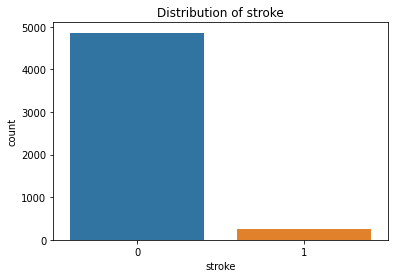

In [153]:
sns.countplot(x=df_raw['stroke'])
plt.title('Distribution of stroke')
plt.show()

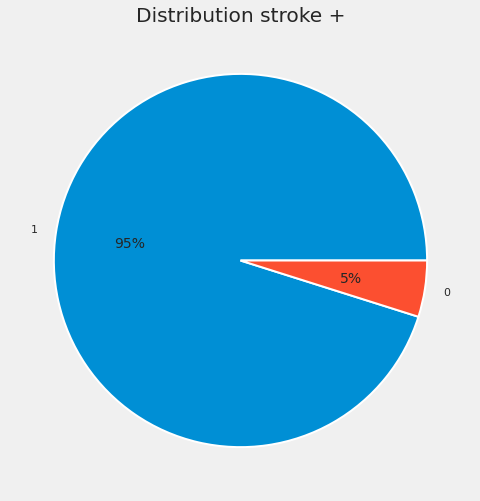

In [285]:
plt.figure(figsize=(12,8))
plt.pie(df_raw["stroke"].value_counts().values, labels=df_raw["stroke"].unique(), autopct="%1.0f%%",wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Distribution stroke +")
plt.show()

**Note: We  have a desbalanced dataset**

An obvious case is in the Health area where we usually find data sets with thousands of records with “negative” patients and a few positive cases, that is, those who suffer from the disease we want to classify.

If we measure the effectiveness of our model by the number of hits it had, only taking into account the majority class we may be having a false feeling that the model works well.
We have four possible cases for each class:

- High precision and high recall: the model perfectly handles that class
- High precision and low recall: the model does not detect the class very well, but when it does, it is highly reliable.
- Low precision and high recall: The class detects the class well but also includes samples from other classes.
- Low precision and low recall: The model fails to classify the class correctly.

When we have a dataset with imbalance, it usually happens that we obtain a high precision value in the Majority class and a low recall in the Minority class.




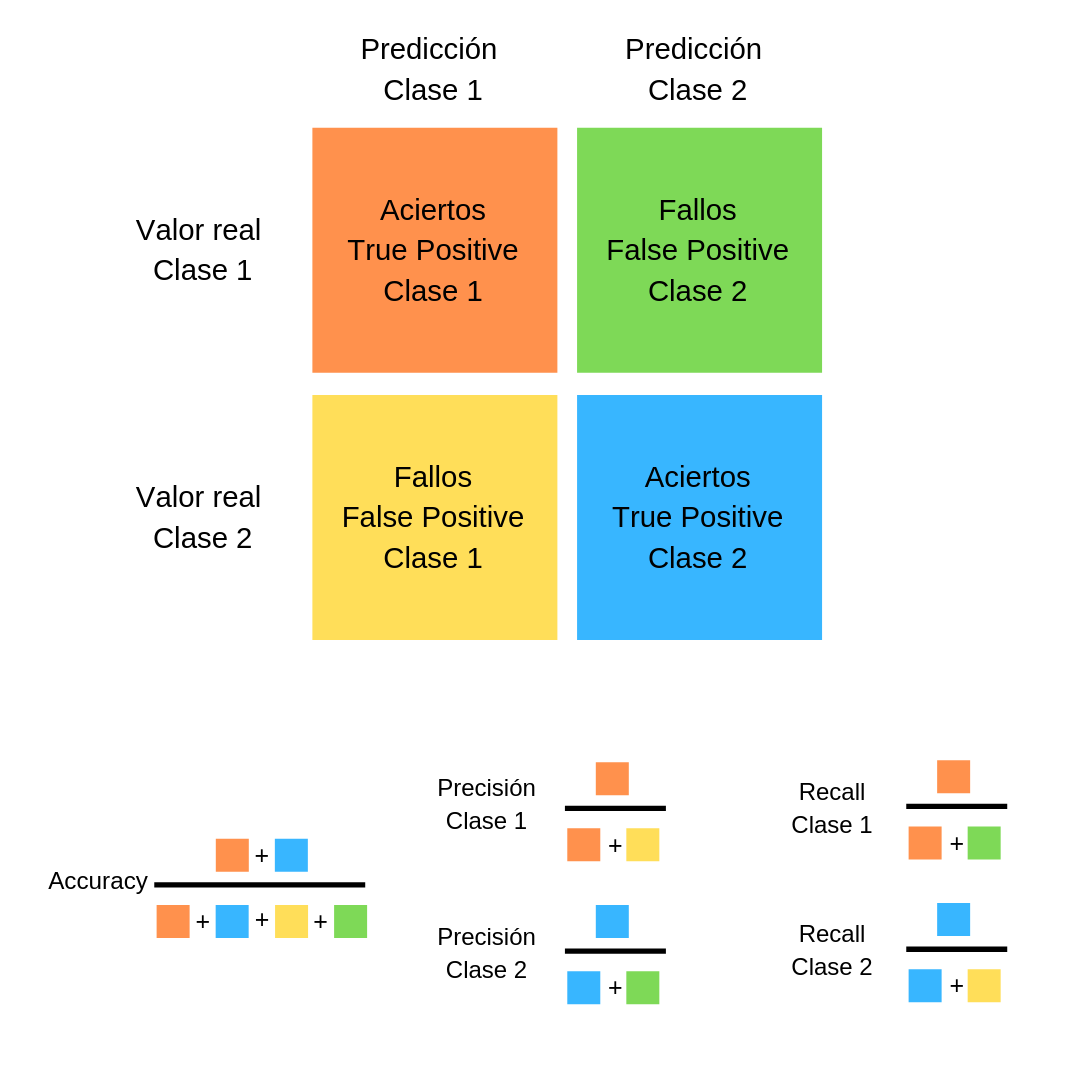

***There are several strategies for working with unbalanced datasets that we will discuss later.***

*Let continuing to study the variables*

**Gender**

<AxesSubplot:>

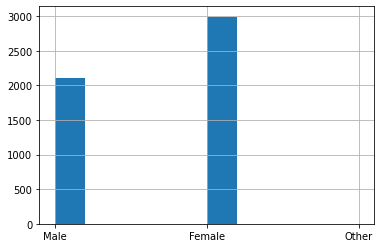

In [154]:
df_raw.gender.hist()

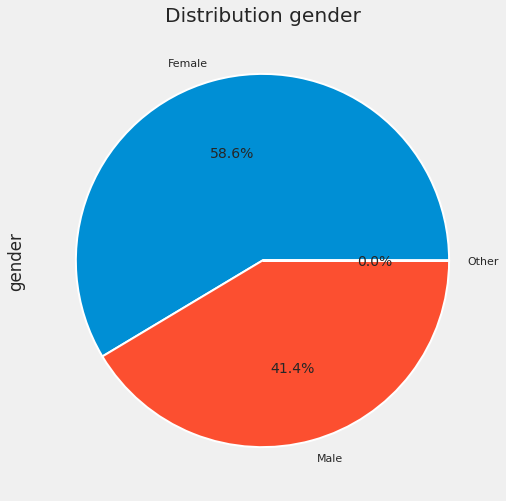

In [288]:
plt.figure(figsize=(12,8))
df_raw.gender.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution gender")
plt.show()



***Residence_Type***  

1.   Urban
2.   Rural



In [155]:
df_raw['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

<AxesSubplot:>

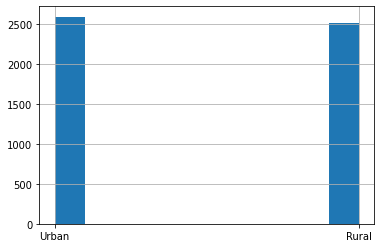

In [156]:
df_raw.Residence_type.hist()

***Ever_married***

*   Yes
*   No



In [157]:
df_raw['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

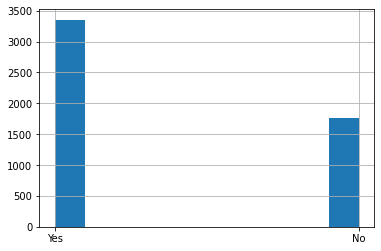

In [158]:
df_raw.ever_married.hist()

***Work_Type***

*   Private
*   Govt_job
*   Self-employed
*   children
*   Never_worked







In [159]:
df_raw['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

<AxesSubplot:>

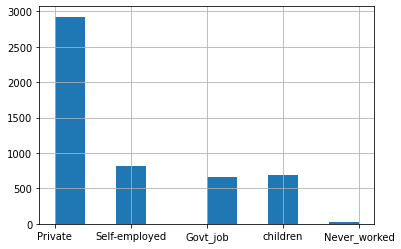

In [160]:
df_raw.work_type.hist()

***smoking_status***
 * never_smoked
 * fromerly smoked
 * smokes
 * Unknown


    "formerly smoked": An adult who has smoked in his or her lifetime but who had quit smoking at the time of interview.
    "Unknown": not have data about this patients


In [161]:
df_raw['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:>

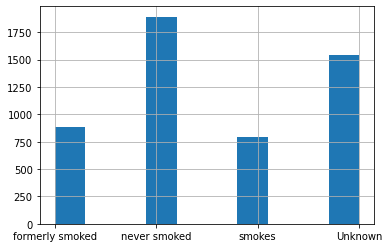

In [162]:
df_raw.smoking_status.hist()

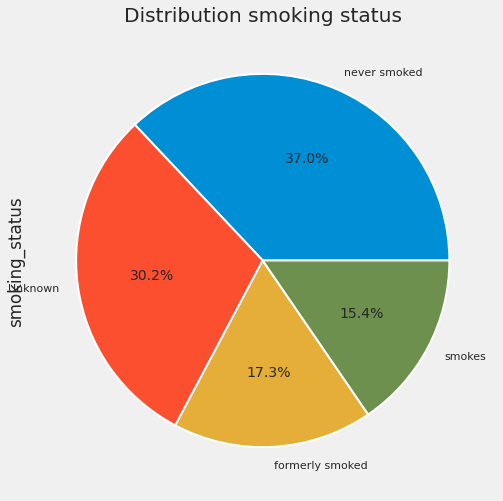

In [287]:
plt.figure(figsize=(12,8))
df_raw.smoking_status.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution smoking status")
plt.show()



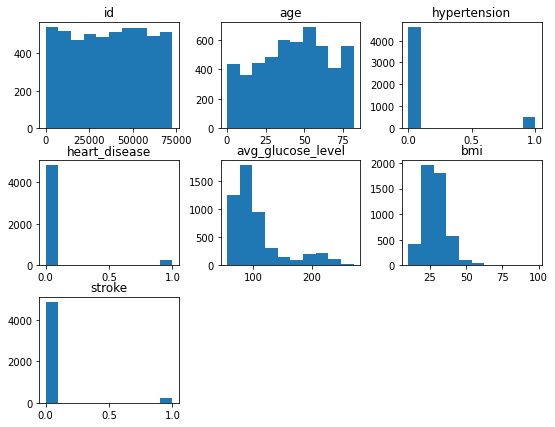

In [163]:
df_raw.hist(bins=10,figsize=(9,7),grid=False);
plt.show()

***We look for information about some variables to study our dataset***

***hypertension***

Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries, the major blood vessels in the body. Hypertension is when blood pressure is too high.




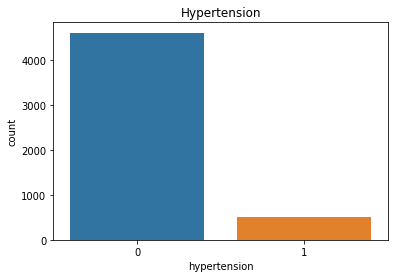

In [164]:
sns.countplot(x=df_raw['hypertension'])   #,hue=df_raw['stroke']
plt.title('Hypertension')
plt.show()

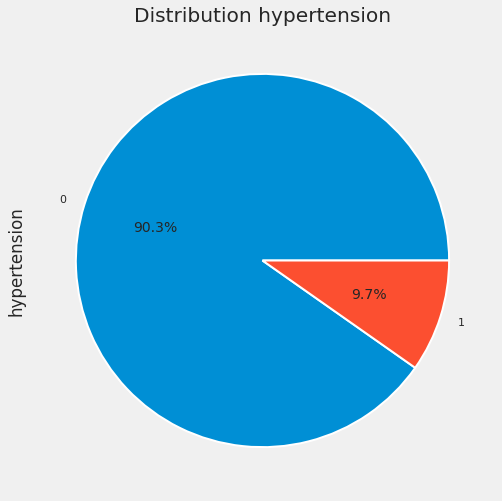

In [289]:
plt.figure(figsize=(12,8))
df_raw.hypertension.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution hypertension")
plt.show()



***avg_glocose_level***
Glycemia is the concentration of glucose or sugar in the blood, coming from food, especially carbohydrates. "average glucose" is a way of translating A1C test results into terms that closely represent daily glucose readings. It was introduced by the American Diabetes Association (ADA) in 2010 to help people with diabetes better understand how their A1C results compare to their daily glucose readings.

The eAG is determined using a straightforward mathematical formula that converts percentage of glycated hemoglobin as determined by an A1C test into the unit you're used to seeing on your glucometer: mg/dL: 28.7 X A1C – 46.7 = eAG.

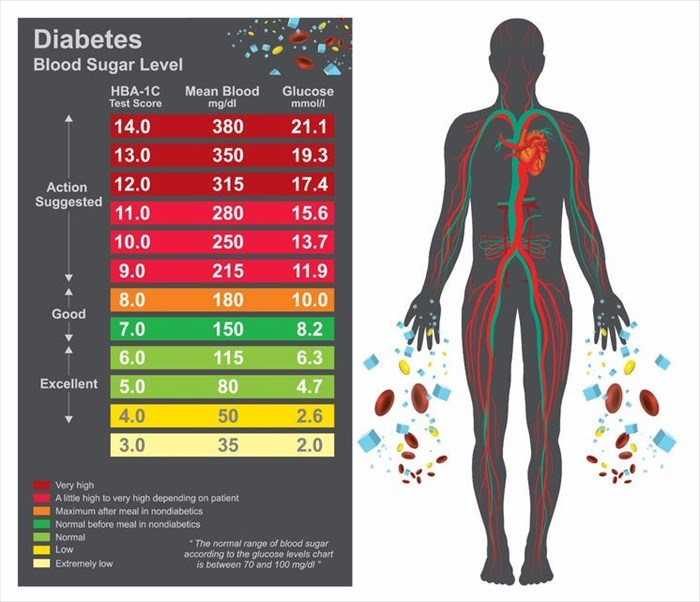

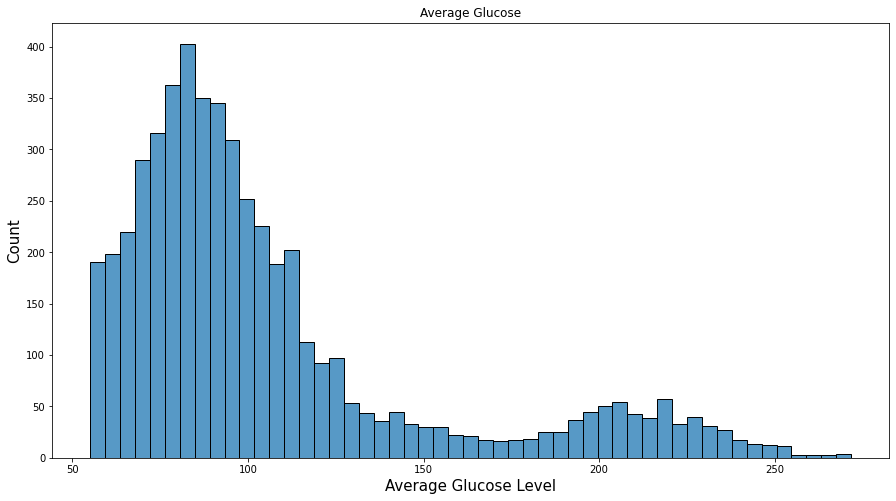

In [165]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_raw, x="avg_glucose_level")  #, hue="stroke"
plt.xlabel("Average Glucose Level", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title('Average Glucose')
plt.show()

***BMI:***

Body mass index (BMI) is a person's ***weight in kilograms*** divided by the ***square of height in meters***. BMI is an easy and inexpensive screening method for weight category: underweight, healthy weight, overweight, and obesity.
The bmi is a parameter that is widely used to assess the nutritional status of a person, since it correlates 80% with body fat and, together with other anthropometric measurements, can bring us closer to the diagnosis of overweight or obesity.

It is known that in adults the normal or healthy BMI is between 18 and 25, however, these normal values ​​can vary over the years. Therefore, below we present a table where the normality of the BMI according to age is presented.

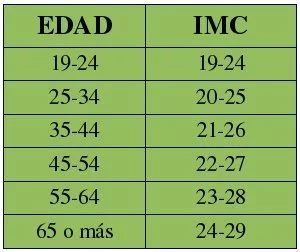


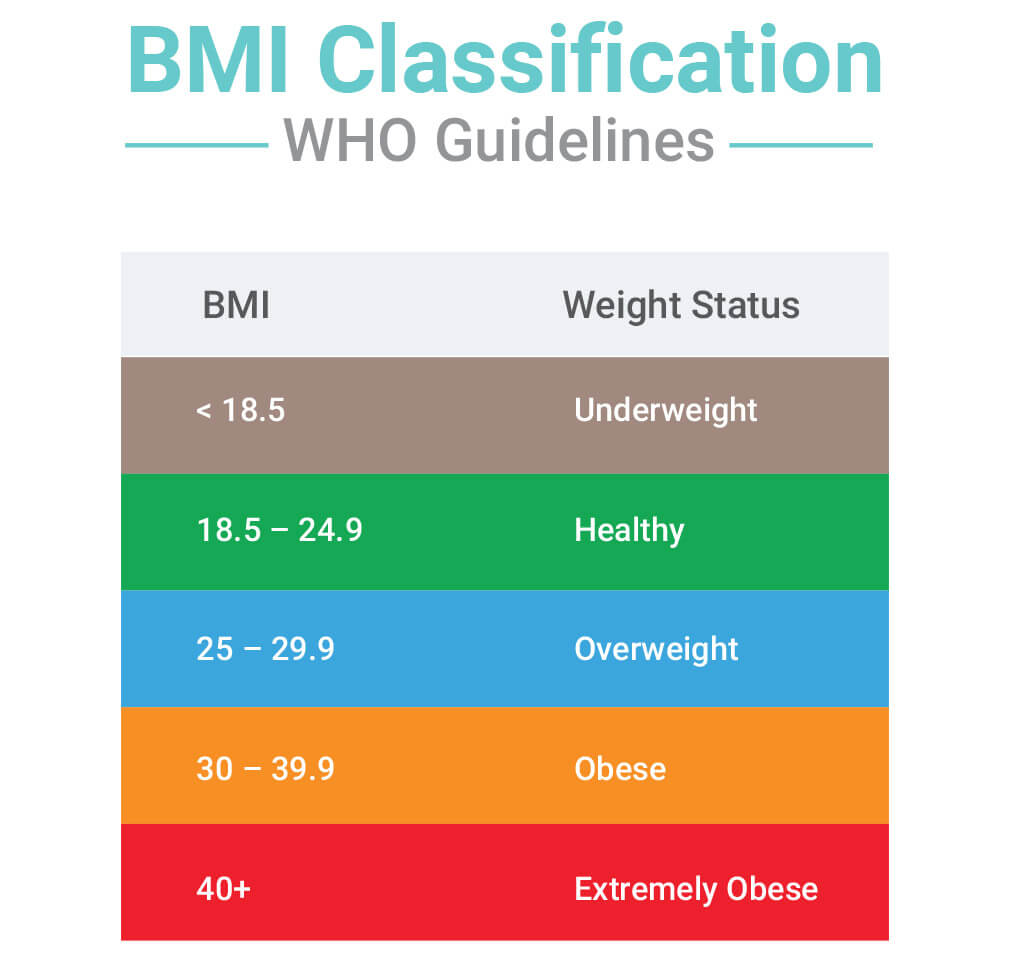

<AxesSubplot:>

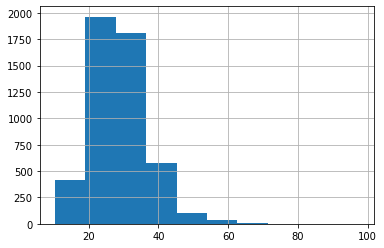

In [166]:
df_raw.bmi.hist()

In [167]:
df_raw.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

We must study the age distribution. We have read that most studies are carried out on populations > 35 years.

Most patients do not have deviations in Hypertensión and heart_disease. 
75% Glucose values ​​on average are within the normal range, however we have high maximum values (271 mg/dl). 
Regarding bmi values, we can conclude that we have a mostly obese population, which could lead us to biased information.

We will have to study the extreme values ​​of this variables.





**Studie duplicates**

In [168]:
df_duplicates = df_raw['id'].duplicated().sum()
df_duplicates

0

Theres is not duplicated observation

**Age** 

<AxesSubplot:>

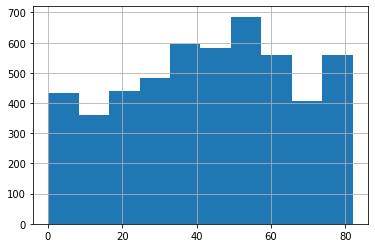

In [169]:
df_raw.age.hist()

In [272]:
def age_cohort(age):
    if   age >= 0 and age <= 35:
        return "0-35"
    elif age > 34 and age <= 45:
        return "35-45"
    elif age > 45 and age <= 65:
        return "46-65"
    elif age > 65 and age <= 75:
        return "66-75"
    elif age > 75:
        return "75+"

In [273]:
df_copy = df_raw.copy()
df_copy['age_group'] = df_copy['age'].apply(age_cohort)
df_copy.sort_values('age_group', inplace = True)

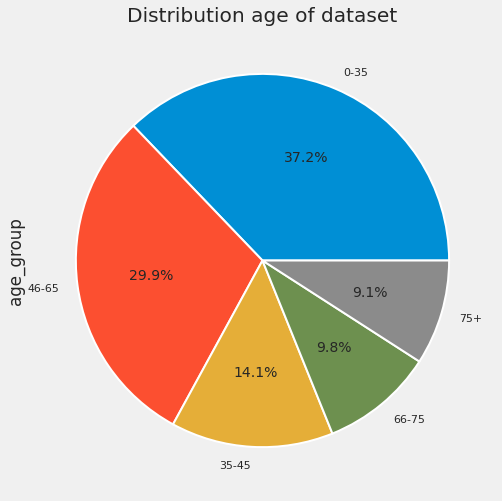

In [275]:
plt.figure(figsize=(12,8))
df_copy.age_group.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution age of dataset")
plt.show()



In [170]:
df_raw[(df_raw['age']<45)]['stroke'].value_counts()

0    2523
1      10
Name: stroke, dtype: int64

In [171]:
df_raw[(df_raw['age']>44) & (df_raw['age']<66)]['stroke'].value_counts()

0    1529
1      83
Name: stroke, dtype: int64

In [172]:
df_raw[(df_raw['age']>65) ]['stroke'].value_counts()

0    809
1    156
Name: stroke, dtype: int64

In [173]:
#df_filter_age35 = df_raw[df_raw['age']>35]
#df_filter_age35['stroke'].value_counts()

**We have read that most studies are carried out on populations > 35 years, so we resolved remove all observation below 35 years old**

**Working the model we conclude that is better not remove them**


In [174]:
#df_raw = df_filter_age35.copy()

In [175]:
df_raw['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

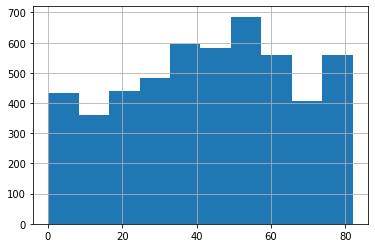

In [176]:
df_raw.age.hist()

**Studie of the missing values of BMI**



In [177]:
df_raw[df_raw['bmi'].isna()].shape

(201, 12)

Showing records where patient suffered from stroke but had missing value in bmi attribute.

In [178]:
df_raw[df_raw['bmi'].isna() & df_raw['stroke'] == 1].shape


(40, 12)

**We have 201 records were listed as NaN (not a number) in the BMI column. The first thought was to remove them since they represented a small fraction of the dataset. Nevertheless, by probing further, it contained 40 records where patients suffered a stroke. This information was valuable considering the fact that only 249 patients suffered a stroke in all  dataset.**


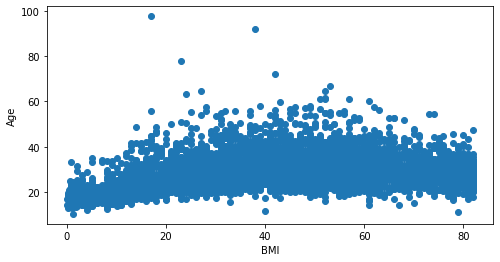

In [179]:
plt.figure(figsize = (8, 4))
plt.scatter(y=df_raw['bmi'], x=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

In [180]:
df_raw[df_raw['bmi']<19].shape

(404, 12)

In [181]:
df_raw[(df_raw['bmi']>= 19) & (df_raw['bmi']< 25)].shape

(1176, 12)

In [182]:
df_raw[(df_raw['bmi']>= 25) & (df_raw['bmi']< 30)].shape

(1409, 12)

In [183]:
df_raw[(df_raw['bmi']>= 30) & (df_raw['bmi']< 40)].shape

(1506, 12)

In [184]:
df_raw[df_raw['bmi']>= 40] .shape

(414, 12)

**Resume Preview of BMI dataset:**
-  201 missing value
-  404 observation whith underweight
- 1176 observation whith healthy weight
- 1409 observation whith overweight
- 1506 observation are obese
-  414 observation are extremely obese 

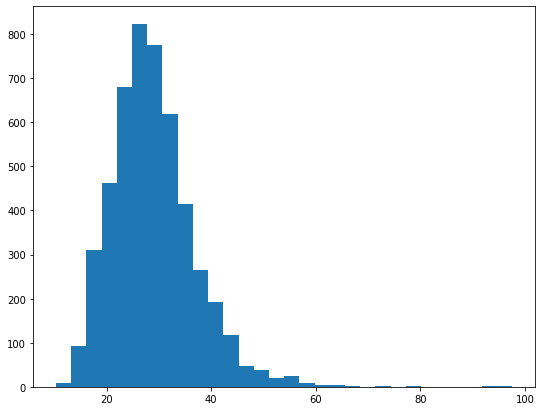

In [185]:
df_raw['bmi'].hist(bins=30,figsize=(9,7),grid=False);
plt.show()

**The are same outliers of bmi**

**Studie of missing BMI**

Missing values ​​are present in most of the data sets we work with in our day to day. They are those in which no data value is stored in an observation. It is of vital importance to identify and deal with, for example, by imputation, these values ​​in order to continue with our analysis or training of the machine learning model.


Given the observations we have, we know that it is not feasible to output the observations with MBI null. That is why we must define what technique to use to complete those values.

1- The first technique consists of filling these values ​​with the mean (or median) of the data of the variable in the case that it is a numerical variable. For the case of categorical variables, we impute the missing values ​​with the mode of the variable.

2- Another more advanced technique consists of the use of predictive models to estimate missing values. A very popular non-parametric model for these cases is the k-nearest neighbors model, where the missing value is estimated as the mean (in the case of numerical variables) of the values ​​of the k closest neighbors or observations. Likewise, for categorical variables, the majority class of the closest k is used (KNN).
La librería scikit-learn nos proporciona la clase KNNImputer para hacer uso de este modelo en la imputación de missing values. Esta clase usa por defecto la distancia euclidiana, pero podemos elegir la que prefiramos modificando el parámetro metric. Asimismo, también podemos elegir el número de vecinos con el argumento n_neighbors y en esta ocasión usaremos 5. Podeís ver en el siguiente código como utilizamos este método para imputar los valores perdidos en la variable normalized-losses.

3-  Decision Tree to predict the missing BMI




We read that bmi is related to age. According to the graph found, we observe that the intervals are 5 years.
We define bins of 5 years starting at 35. 
We assign to the null values ​​of bmi the mean of the bins to which the observation corresponds.
Let show step by step.

In [307]:
def bmi_cohort(bmi):
    if   bmi >= 1 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [308]:
df_copy = df_raw.copy()
df_copy['bmi_group'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_group', inplace = True)

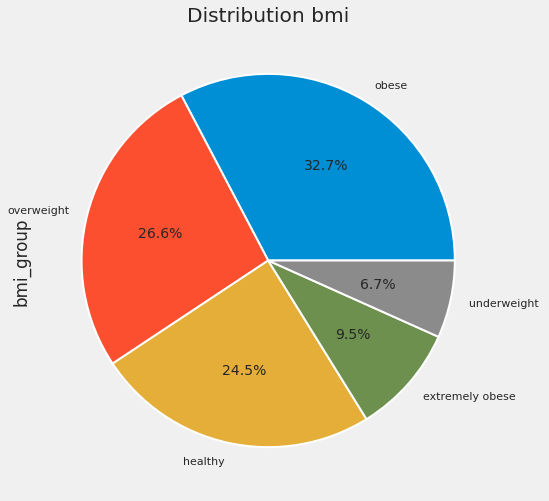

In [309]:
plt.figure(figsize=(12,8))
df_copy.bmi_group.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution bmi")
plt.show()

In [310]:
# Same labels as yours
labels = ['<34','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +']

# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]

# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
df_raw
 

id  gender    age  hypertension  heart_disease ever_married  \
0      9046    Male  67.00             0              1          Yes   
1     51676  Female  61.00             0              0          Yes   
2     31112    Male  80.00             0              1          Yes   
3     60182  Female  49.00             0              0          Yes   
4      1665  Female  79.00             1              0          Yes   
5     56669    Male  81.00             0              0          Yes   
6     53882    Male  74.00             1              1          Yes   
7     10434  Female  69.00             0              0           No   
8     27419  Female  59.00             0              0          Yes   
9     60491  Female  78.00             0              0          Yes   
10    12109  Female  81.00             1              0          Yes   
11    12095  Female  61.00             0              1          Yes   
12    12175  Female  54.00             0              0          Yes   
13     8213    Male  78.00             0              1          Yes   
14     5317  Female  79.00             0              1          Yes   
15    58202  Female  50.00             1              0          Yes   
16    56112    Male  64.00             0              1          Yes   
17    34120    Male  75.00             1              0          Yes   
18    27458  Female  60.00             0              0           No   
19    25226    Male  57.00             0              1           No   
20    70630  Female  71.00             0              0          Yes   
21    13861  Female  52.00             1              0          Yes   
22    68794  Female  79.00             0              0          Yes   
23    64778    Male  82.00             0              1          Yes   
24     4219    Male  71.00             0              0          Yes   
25    70822    Male  80.00             0              0          Yes   
26    38047  Female  65.00             0              0          Yes   
27    61843    Male  58.00             0              0          Yes   
28    54827    Male  69.00             0              1          Yes   
29    69160    Male  59.00             0              0          Yes   
30    43717    Male  57.00             1              0          Yes   
31    33879    Male  42.00             0              0          Yes   
32    39373  Female  82.00             1              0          Yes   
33    54401    Male  80.00             0              1          Yes   
34    14248    Male  48.00             0              0           No   
35      712  Female  82.00             1              1           No   
36    47269    Male  74.00             0              0          Yes   
37    24977  Female  72.00             1              0          Yes   
38    47306    Male  58.00             0              0           No   
39    62602  Female  49.00             0              0          Yes   
40     4651    Male  78.00             0              0          Yes   
41     1261    Male  54.00             0              0          Yes   
42    61960    Male  82.00             0              1          Yes   
43     1845  Female  63.00             0              0          Yes   
44     7937    Male  60.00             1              0          Yes   
45    19824    Male  76.00             1              0          Yes   
46    37937  Female  75.00             0              1           No   
47    47472  Female  58.00             0              0          Yes   
48    35626    Male  81.00             0              0          Yes   
49    36338  Female  39.00             1              0          Yes   
50    18587  Female  76.00             0              0           No   
51    15102    Male  78.00             1              0          Yes   
52    59190  Female  79.00             0              1          Yes   
53    47167  Female  77.00             1              0          Yes   
54     8752  Female  63.00             0         

In [314]:
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw[df_raw['bmi'].isna()].sample(10)

id  gender   age  hypertension  heart_disease ever_married  \
247   34060    Male  71.0             1              0          Yes   
1324    132  Female  80.0             0              0          Yes   
729    1246  Female  43.0             0              0          Yes   
4255   3318  Female  18.0             0              0           No   
3734  51852  Female  13.0             0              0           No   
1471    937    Male   7.0             0              0           No   
174   40899  Female  78.0             0              0          Yes   
1836   1818  Female  30.0             0              0           No   
1669   1842    Male  58.0             0              0          Yes   
4750  16902  Female  70.0             0              1          Yes   

          work_type Residence_type  avg_glucose_level  bmi   smoking_status  \
247   Self-employed          Rural              87.80  NaN          Unknown   
1324       Govt_job          Urban              84.86  NaN          Unknown   
729        Govt_job          Rural             107.42  NaN     never smoked   
4255        Private          Rural             101.12  NaN           smokes   
3734       children          Rural             219.81  NaN          Unknown   
1471       children          Urban              87.94  NaN          Unknown   
174   Self-employed          Rural              60.67  NaN  formerly smoked   
1836       Govt_job          Urban              88.20  NaN           smokes   
1669        Private          Urban              94.00  NaN          Unknown   
4750  Self-employed          Urban             240.69  NaN           smokes   

      stroke   age_bins    bmi_new  
247        1     65 - +  29.557083  
1324       0     65 - +  29.557083  
729        0  35 - 44.9  31.333433  
4255       0        <34  25.425751  
3734       0        <34  25.425751  
1471       0        <34  25.425751  
174        1     65 - +  29.557083  
1836       0        <34  25.425751  
1669       0  55 - 64.9  31.343135  
4750       0     65 - +  29.557083

In [315]:
df_raw.sample(20)

id  gender   age  hypertension  heart_disease ever_married  \
3015  51421  Female  54.0             0              0          Yes   
972   19101  Female  16.0             0              0           No   
5104  14180  Female  13.0             0              0           No   
4695  46514  Female  50.0             0              0          Yes   
3957  28013  Female  38.0             0              0          Yes   
3244  15803  Female  45.0             0              0          Yes   
1012  72779  Female  14.0             0              0           No   
244   17739    Male  57.0             0              0          Yes   
1737  54353  Female  78.0             1              1          Yes   
2791  49120  Female  39.0             0              0          Yes   
1764  50978  Female  31.0             0              0          Yes   
1478  42902    Male  35.0             0              0          Yes   
4358  33924  Female  26.0             0              0           No   
2487  44325    Male  78.0             0              0          Yes   
4864  13236  Female  13.0             0              0           No   
901   14924    Male  48.0             0              0          Yes   
4733   7529    Male  67.0             0              0          Yes   
4475  60675  Female  48.0             1              0          Yes   
3446  11595  Female  21.0             0              0           No   
931   54620    Male  40.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
3015        Private          Rural              65.38  25.9          Unknown   
972         Private          Urban              87.98  22.4     never smoked   
5104       children          Rural             103.08  18.6          Unknown   
4695       Govt_job          Urban             100.93  32.7     never smoked   
3957  Self-employed          Urban              98.37  27.2     never smoked   
3244        Private          Rural              73.87  25.6          Unknown   
1012       children          Urban             131.77  31.0          Unknown   
244         Private          Rural              84.96  36.7          Unknown   
1737        Private          Urban             227.16  41.7     never smoked   
2791       Govt_job          Rural              69.38  22.1          Unknown   
1764       Govt_job          Urban              94.40  39.8          Unknown   
1478        Private          Rural             102.34  34.3     never smoked   
4358        Private          Urban              80.94  22.2           smokes   
2487  Self-employed          Rural             126.39  21.3           smokes   
4864       children          Rural              73.48  22.9          Unknown   
901         Private          Urban              72.36  34.7           smokes   
4733        Private          Rural              83.16  25.5  formerly smoked   
4475       Govt_job          Rural             221.08  57.2     never smoked   
3446        Private          Urban              88.51  20.5     never smoked   
931         Private          Urban              78.11  35.3     never smoked   

      stroke   age_bins  bmi_new  
3015       0  45 - 54.9     25.9  
972        0        <34     22.4  
5104       0        <34     18.6  
4695       0  45 - 54.9     32.7  
3957       0  35 - 44.9     27.2  
3244       0  45 - 54.9     25.6  
1012       0        <34     31.0  
244        1  55 - 64.9     36.7  
1737       0     65 - +     41.7  
2791       0  35 - 44.9     22.1  
1764       0        <34     39.8  
1478       0  35 - 44.9     34.3  
4358       0        <34     22.2  
2487       0     65 - +     21.3  
4864       0        <34     22.9  
901        0  45 - 54.9     34.7  
4733       0     65 - +     25.5  
4475       0  45 - 54.9     57.2  
3446       0        <34     20.5  
931        0  35 - 44.9     35.3

In [316]:
df_raw[df_raw['bmi'].isna()].shape

(201, 14)

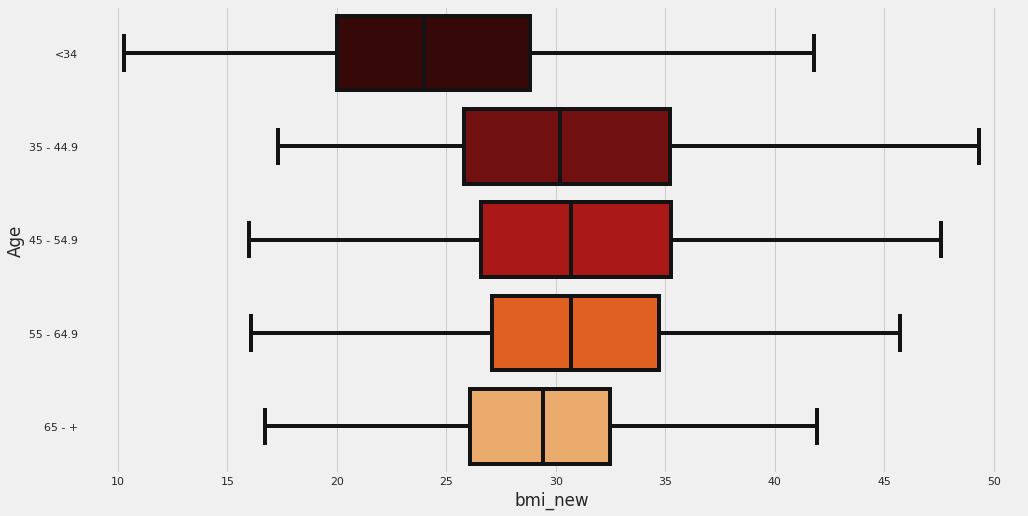

In [317]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Age') 
plt.show()

With this graph we observe that the behavior of the age/bmi ranges is the same as the graph that we mentioned at the beginning of this task.

**Change bmi null by mean of all bmi value**

In [318]:
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)


In [319]:
df_raw[df_raw['bmi'].isna()].shape

(0, 14)

**Now we have all BMI whith values.**

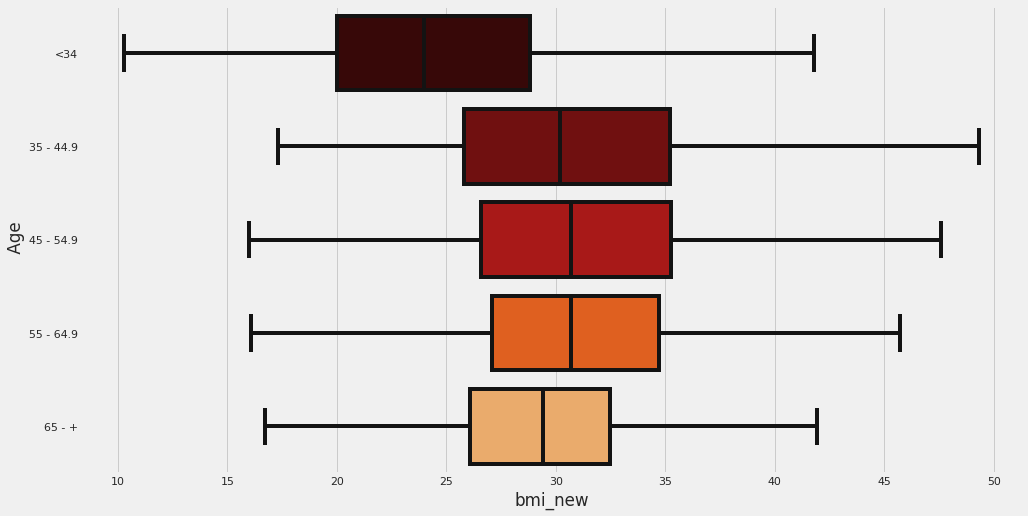

In [320]:
plt.figure(figsize = (15, 8))
sns.boxplot(y = df_raw.age_bins, x = df_raw.bmi_new, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel(' Age') 
plt.show()

In [321]:
def bmi_cohort(bmi):
    if   bmi >= 0 and bmi <= 18:
        return "underweight "
    elif bmi > 18 and bmi <= 24:
        return "healthy"
    elif bmi > 25 and bmi <= 29:
        return "overweight"
    elif bmi > 30 and bmi <= 39:
        return "obese"
    elif bmi > 40:
        return "extremely obese"

In [322]:
df_copy = df_raw.copy()
df_copy['bmi_type'] = df_copy['bmi'].apply(bmi_cohort)
df_copy.sort_values('bmi_type', inplace = True)

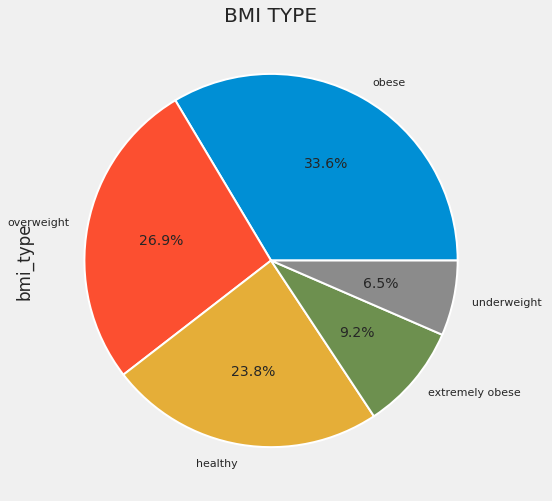

In [323]:
plt.figure(figsize=(12,8))
df_copy.bmi_type.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("BMI TYPE")
plt.show()

In [324]:
df_raw[df_raw['bmi']<19].shape

(404, 14)

In [325]:
df_raw[(df_raw['bmi']>= 19) & (df_raw['bmi']< 25)].shape

(1176, 14)

In [326]:
df_raw[(df_raw['bmi']>= 25) & (df_raw['bmi']< 30)].shape

(1530, 14)

In [327]:
df_raw[(df_raw['bmi']>= 30) & (df_raw['bmi']< 40)].shape

(1586, 14)

In [328]:
df_raw[df_raw['bmi']>= 40].shape

(414, 14)

**Resume BMI after filling missing data:**
-  404 underweight
- 1176 healthy 
- 1530 overweight
- 1586 obese
-  414 extremely obese 

In [329]:
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)

**Transform if needed**

In this dataset, there are 3 numerical attributes, age, average glucose level and bmi. Let’s normalize them to ensure that they have equal weightage when building a classifier. Noted that new columns were created rather than replacing the initial columns. This preserved the original data.

In [202]:
df_raw.sample(10)

gender   age  hypertension  heart_disease ever_married      work_type  \
3446  Female  21.0             0              0           No        Private   
869   Female  37.0             0              0          Yes        Private   
1047  Female   5.0             0              0           No       children   
4727  Female  59.0             0              0          Yes       Govt_job   
2527    Male  78.0             0              1          Yes        Private   
569   Female  32.0             0              0           No  Self-employed   
3661    Male  11.0             0              0           No       children   
3190  Female  52.0             0              0          Yes        Private   
4988  Female  79.0             0              0          Yes       Govt_job   
1750  Female  73.0             0              0          Yes  Self-employed   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3446          Urban              88.51  20.5     never smoked       0  
869           Urban              84.13  27.0     never smoked       0  
1047          Rural              84.93  17.6          Unknown       0  
4727          Urban              98.52  29.8  formerly smoked       0  
2527          Urban             145.03  26.8  formerly smoked       0  
569           Urban              65.30  40.4     never smoked       0  
3661          Rural              96.91  20.4          Unknown       0  
3190          Urban             106.54  22.4     never smoked       0  
4988          Urban              95.42  21.5  formerly smoked       0  
1750          Urban              88.52  20.8  formerly smoked       0

<AxesSubplot:>

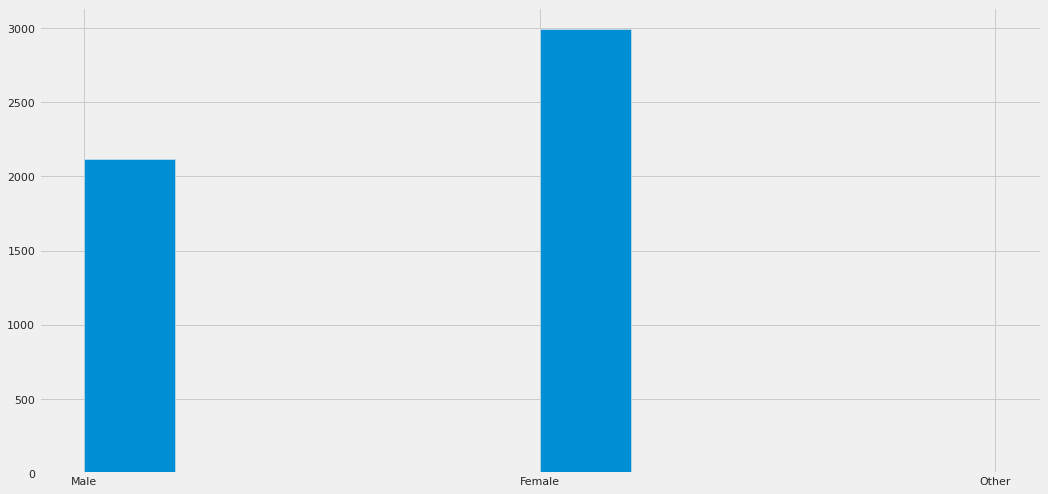

In [330]:
df_raw.gender.hist()

In [204]:
#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)

# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)


0       3
1       1
2       1
3       2
4       1
       ..
5105    1
5106    1
5107    1
5108    3
5109    0
Name: smoking_status, Length: 5110, dtype: int64

In [205]:
#Remove features
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)

In [206]:
df_raw.sample(20)

gender  age  hypertension  avg_glucose_level        bmi  smoking_status  \
3793       1   24             0              65.44  23.600000               1   
1220       1   20             0             112.08  23.000000               1   
681        1   16             0              74.98  21.400000               1   
3306       0   52             1             214.43  39.900000               2   
4616       0   59             0             223.16  31.343135               0   
2792       1   42             0              72.00  34.400000               1   
655        1   28             0              64.64  22.100000               1   
1659       0   63             0             199.14  28.500000               1   
2858       0    6             0             123.39  15.200000               0   
3477       0   14             0              74.54  25.200000               0   
4407       1   34             0              70.87  55.700000               3   
2681       1    2             0              92.30  14.800000               0   
2215       0   67             0              97.24  29.557083               0   
3339       1   62             0              98.14  42.000000               0   
3992       0   39             0             125.11  24.900000               3   
4725       1   46             0             106.47  27.200000               0   
3706       0   34             0              66.96  26.100000               1   
3440       0    0             0              98.23  14.100000               0   
2129       0   50             1             220.36  40.900000               3   
2657       1   36             0             129.43  29.700000               1   

      stroke  
3793       0  
1220       0  
681        0  
3306       0  
4616       0  
2792       0  
655        0  
1659       0  
2858       0  
3477       0  
4407       0  
2681       0  
2215       0  
3339       0  
3992       0  
4725       0  
3706       0  
3440       0  
2129       0  
2657       0

In [207]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   smoking_status     5110 non-null   int64  
 6   stroke             5110 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 279.6 KB


## Countplot for categorical variables

We ask ourselves some questions. These are all questions that can be explored and answered with some data visulization.

Does age makes one more likely to suffer a stroke? 

What about gender? 

BMI?


In [208]:
variables = [variable for variable in df_raw.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

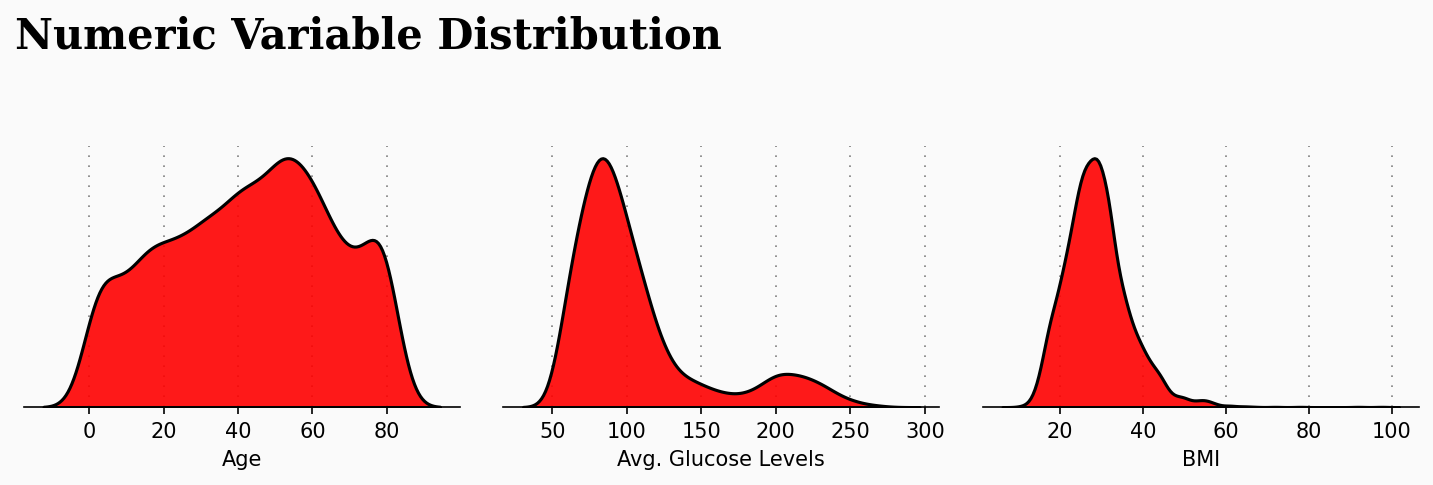

In [209]:
fig = plt.figure(figsize=(12, 12), dpi=150, facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df_raw[variable] ,ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')


ax0.text(-20, 0.023, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')


plt.show()

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

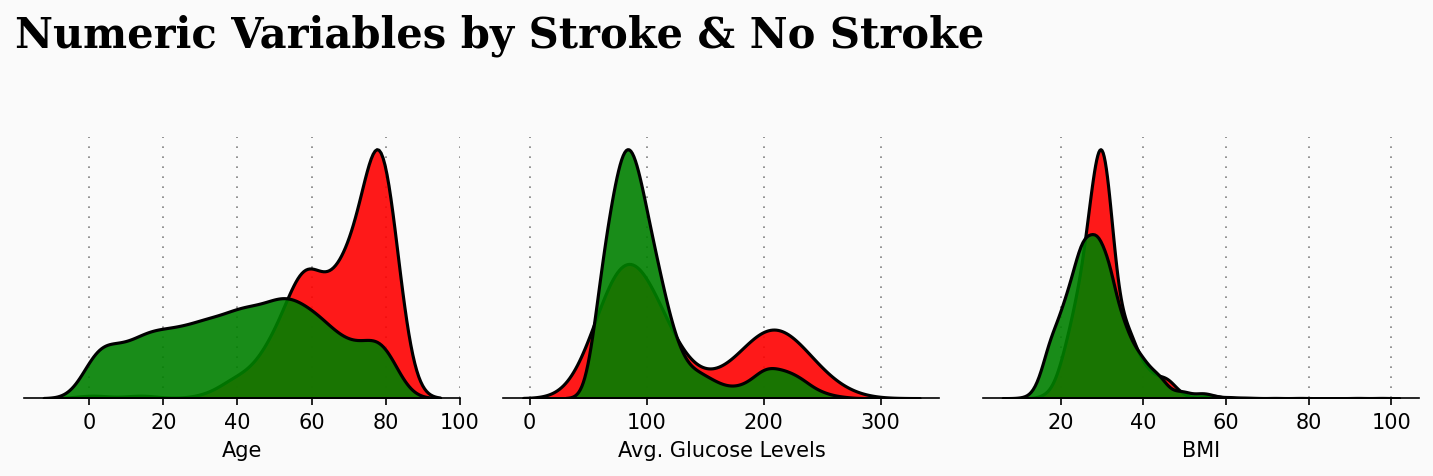

In [210]:
fig = plt.figure(figsize=(12, 12), dpi=150,facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)


plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df_raw[df_raw['stroke'] == 1]
ns = df_raw[df_raw['stroke'] == 0]
##0f4c81
##9bb7d4
for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='red', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='green', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Age')
ax1.set_xlabel('Avg. Glucose Levels')
ax2.set_xlabel('BMI')
#ax3.set_xlabel('Gender')

        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')

plt.show()

**Age looks to be a prominent factor** 

In [211]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=df_raw)
    plt.show()

def countplot_targetvsfeature(data, feature,y):
    fig = plt.figure(figsize=(20,5))
    plot=sns.countplot(x=feature,data=data,hue=y)
    plt.show()  

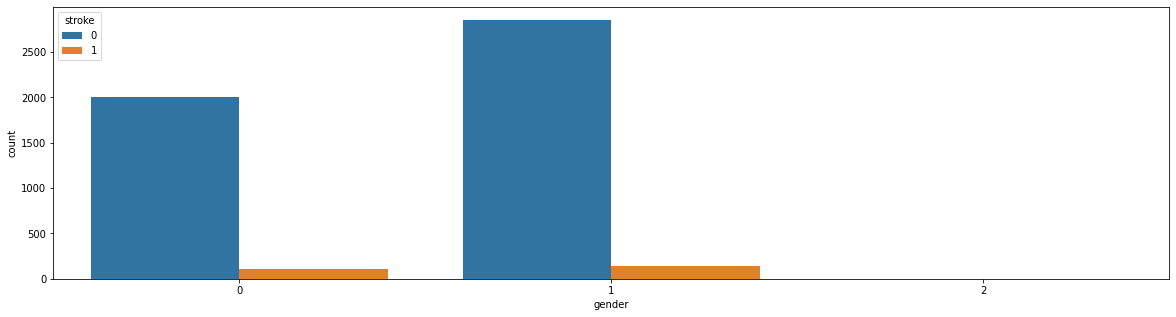

In [212]:
countplot_targetvsfeature(df_raw,'gender','stroke')

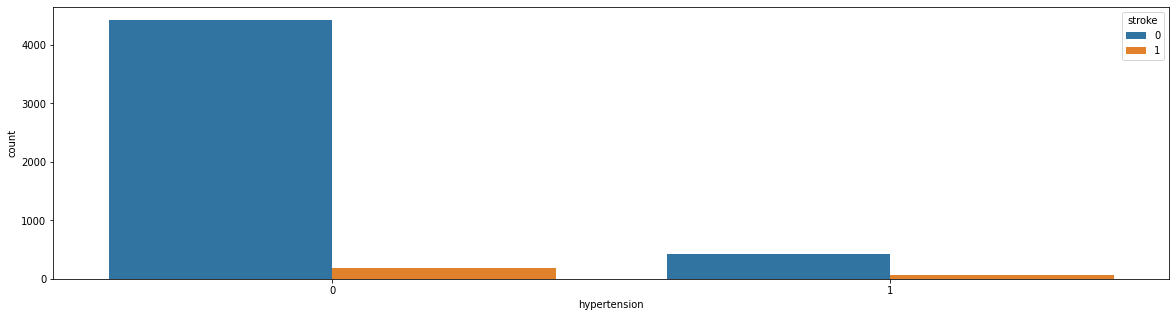

In [213]:
countplot_targetvsfeature(df_raw,'hypertension','stroke')


In [214]:
#countplot_targetvsfeature(df_raw,'smoking_status','stroke')


In [215]:

df_raw[(df_raw["stroke"]==1) & (df_raw["smoking_status"]=="Unknown")]



Empty DataFrame
Columns: [gender, age, hypertension, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

## Plotting different features against one other

In [216]:
#matrix = df_raw.corr(columns=["age","Avg. Glucose Levels","bmi"])
#display(matrix)

<AxesSubplot:>

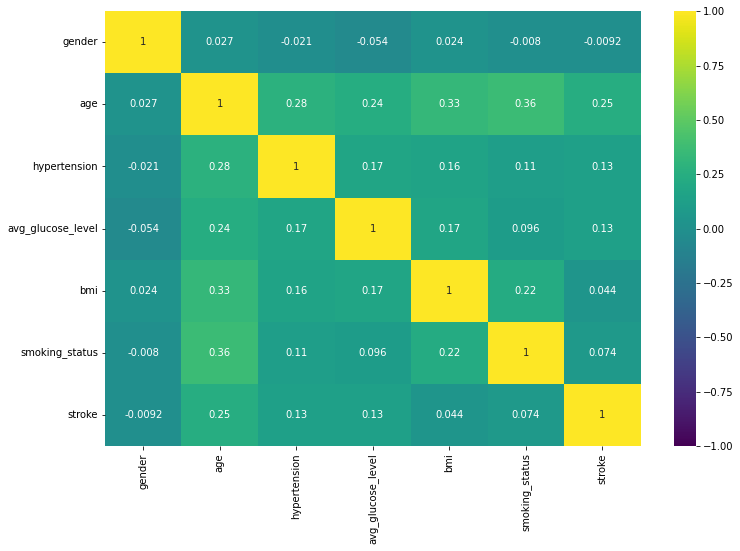

In [217]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

Some feature depend of or are relative to the age. weak relation


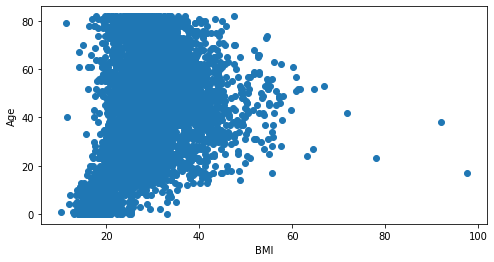

In [218]:
plt.figure(figsize = (8, 4))
plt.scatter(x=df_raw['bmi'], y=df_raw['age'])
plt.ylabel('Age')
plt.xlabel('BMI')
plt.show() 

**The bmi increment and also incremente the age**

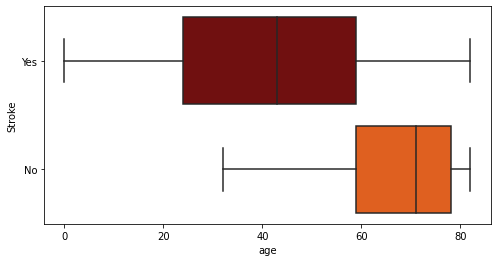

In [219]:
#Checking correlation between age and target:
plt.figure(figsize = (8, 4))
sns.boxplot(y = df_raw.stroke, x = df_raw.age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Stroke')
plt.yticks([0,1], ['Yes','No'])
plt.show()

**OUTLIERS**

In [220]:
df_raw[df_raw['bmi']>60].sort_values(by=['bmi'])

gender  age  hypertension  avg_glucose_level   bmi  smoking_status  \
466        1   61             1             170.05  60.2               2   
270        1   57             1             129.54  60.9               2   
4838       1   51             0             107.72  60.9               0   
2840       1   52             0              98.27  61.2               0   
3825       1   52             0             118.46  61.6               2   
2764       1   24             0              85.55  63.3               1   
4188       1   27             0              57.96  64.4               1   
358        0   52             0              78.40  64.8               1   
1559       1   53             0              72.63  66.8               0   
544        0   42             0             210.48  71.9               1   
928        1   23             1              70.03  78.0               2   
4209       0   38             1              56.90  92.0               1   
2128       0   17             1              61.67  97.6               0   

      stroke  
466        0  
270        0  
4838       0  
2840       0  
3825       0  
2764       0  
4188       0  
358        0  
1559       0  
544        0  
928        0  
4209       0  
2128       0

## *will remove  92  and 97 bmi ?*


In [221]:
df_raw[df_raw['age']>80].sort_values(by=['bmi'])

gender  age  hypertension  avg_glucose_level   bmi  smoking_status  \
230        1   81             0              81.95  16.9               1   
4511       1   82             0              82.63  17.9               2   
1630       1   81             0             114.88  18.3               3   
568        1   81             0              71.91  19.2               0   
103        1   81             0              78.70  19.4               0   
...      ...  ...           ...                ...   ...             ...   
4824       1   81             0              91.82  36.9               0   
5062       1   82             0             211.58  36.9               1   
5106       1   81             0             125.20  40.0               1   
4515       1   81             1             216.07  43.4               1   
1529       1   82             0             253.16  47.5               0   

      stroke  
230        1  
4511       0  
1630       0  
568        0  
103        1  
...      ...  
4824       0  
5062       0  
5106       0  
4515       0  
1529       0  

[116 rows x 7 columns]

# PIPELINE

#  ATENCION si da el tiempo probar llenar bmi con knn y comparar con los bins

In [222]:
############ YA LO HICIMOS ANTES DE TRANSFORMAR A CATEGORICAS

#def bmi_transformer_func (df):
#    df['age_bins'] = pd.cut(df['age'], bins=[35, 45, 55, 65, np.inf], labels=['35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'], right=False)
#    df['bmi'] =df.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
#    return df


In [223]:
#df_clean = bmi_transformer_func(df_raw)
#df_clean

In [224]:
#preprocessor = ColumnTransformer( 
#   transformers=[
#       # Transformer name, Transformer Object and columns      
#       ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] ),
#       ("id_drop", "drop", ['id','age_bins'])
#    ],
    # Any other columns are ignored
#    remainder="passthrough"

#)

In [225]:
#train_X = preprocessor.fit_transform(df_raw)
#df_raw=pd.DataFrame(train_X)
#df_raw

In [226]:
#pipe_clf = Pipeline([
#  (
#    "FeatureEngineering",
#    ColumnTransformer( 
#          transformers=[
#              # Transformer name, Transformer Object and columns
#              ("id_drop", "drop", ['id','age_bins']), 
#              ('category',OrdinalEncoder(),['Residence_type','ever_married','work_type','smoking_status','gender'] )
#            ],
#            # Any other columns are ignored
#            remainder="passthrough"
#
#        ),
#  )
#])
#pipe_clf.fit_transform(df_raw)

**Dejamos el siguiente solamente para correr más rápido cuando estamos probando los modelos, se saca antes de entregar**

In [227]:
""" df_raw = pd.read_csv('../data/raw/healthcare-dataset-stroke-data.csv')


#Impute BMI value
labels = ['0-34.9','35 - 44.9', '45 - 54.9', '55 - 64.9', '65 - +'] 
# Define the edges between bins
bins = [0,35, 45, 55, 65, np.inf]
# pd.cut each column, with each bin closed on left and open on right
df_raw['age_bins'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)
#set bmi using the mean of each range of age
df_raw['bmi_new'] = df_raw.groupby("age_bins")['bmi'].transform(lambda x: x.fillna(x.mean()))
df_raw['bmi'].fillna(df_raw['bmi_new'], inplace = True)

#set age as int
df_raw['age']=df_raw['age'].astype(int)

# Encoding the 'Sex' column
df_raw['gender'] = df_raw['gender'].map({'Male': 0, 'Female' : 1, 'Other': 2})
df_raw['gender'].astype(int)


# Encoding the 'smoking status' column
df_raw['smoking_status'] = df_raw['smoking_status'].map({'Unknown': 0, 'never smoked' : 1, 'smokes': 2 , 'formerly smoked':3})
df_raw['smoking_status'].astype(int)

#Remove features
df_raw.drop(["age_bins","bmi_new","id"],axis=1,inplace=True)
df_raw.drop(["ever_married","work_type","Residence_type","heart_disease"],axis=1,inplace=True)"""

' df_raw = pd.read_csv(\'../data/raw/healthcare-dataset-stroke-data.csv\')\n\n\n#Impute BMI value\nlabels = [\'0-34.9\',\'35 - 44.9\', \'45 - 54.9\', \'55 - 64.9\', \'65 - +\'] \n# Define the edges between bins\nbins = [0,35, 45, 55, 65, np.inf]\n# pd.cut each column, with each bin closed on left and open on right\ndf_raw[\'age_bins\'] = pd.cut(df_raw[\'age\'], bins=bins, labels=labels, right=False)\n#set bmi using the mean of each range of age\ndf_raw[\'bmi_new\'] = df_raw.groupby("age_bins")[\'bmi\'].transform(lambda x: x.fillna(x.mean()))\ndf_raw[\'bmi\'].fillna(df_raw[\'bmi_new\'], inplace = True)\n\n#set age as int\ndf_raw[\'age\']=df_raw[\'age\'].astype(int)\n\n# Encoding the \'Sex\' column\ndf_raw[\'gender\'] = df_raw[\'gender\'].map({\'Male\': 0, \'Female\' : 1, \'Other\': 2})\ndf_raw[\'gender\'].astype(int)\n\n\n# Encoding the \'smoking status\' column\ndf_raw[\'smoking_status\'] = df_raw[\'smoking_status\'].map({\'Unknown\': 0, \'never smoked\' : 1, \'smokes\': 2 , \'formerly

**Scaler**

In [228]:
scaler = MinMaxScaler()
#scaler =  StandardScaler()
train_scaler = scaler.fit(df_raw[['age','bmi','avg_glucose_level']])
df_raw[['age','bmi','avg_glucose_level']] = train_scaler.transform(df_raw[['age','bmi','avg_glucose_level']])



# MODEL - REGRESSION - TESTS

In [229]:
df_guadar=df_raw.copy()

In [230]:
#we define our labels and features
y = df_raw['stroke']
X = df_raw.drop('stroke', axis=1)
#we divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=13,stratify=y)

In [231]:
X_train

gender       age  hypertension  avg_glucose_level       bmi  \
4611       1  0.207317             0           0.105992  0.396334   
4209       0  0.463415             1           0.008217  0.935853   
2791       1  0.475610             0           0.065830  0.135166   
175        0  0.878049             1           0.601837  0.306987   
4204       1  0.378049             0           0.067399  0.334479   
...      ...       ...           ...                ...       ...   
1048       0  0.695122             0           0.098698  0.216495   
2463       1  0.439024             0           0.002124  0.225659   
678        0  0.304878             0           0.170898  0.296678   
4805       1  0.451220             0           0.184471  0.272623   
2861       0  0.036585             0           0.008771  0.066438   

      smoking_status  
4611               1  
4209               1  
2791               0  
175                1  
4204               2  
...              ...  
1048               3  
2463               1  
678                0  
4805               1  
2861               0  

[3577 rows x 6 columns]

**We define function to display the results**

In [232]:
LABELS1={"No Stroke","Stroke"}
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, xticklabels=LABELS1, yticklabels=LABELS1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,zero_division=False))


## LOGISTIC REGRESSION

In [233]:
#we create a function that creates the model that we will use each time
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

#we run the model "as is"
model_logisticR = run_model(X_train, X_test, y_train, y_test)
 

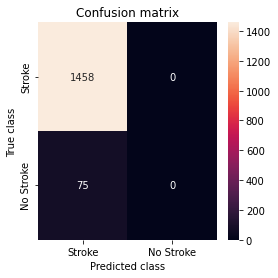

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



In [234]:
pred_y = model_logisticR.predict(X_test)
mostrar_resultados(y_test, pred_y)


* All are classified as non-stroke

## LOGISTIC REGRESSION BALANCED

In [235]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=0.1,penalty='l2',random_state=1,solver="newton-cg",class_weight={1:18,0:1})
    clf.fit(X_train, y_train)
    return clf
 
model_balanced = run_model_balanced(X_train, X_test, y_train, y_test) 



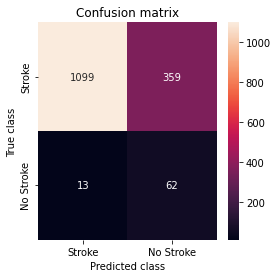

              precision    recall  f1-score   support

           0       0.99      0.75      0.86      1458
           1       0.15      0.83      0.25        75

    accuracy                           0.76      1533
   macro avg       0.57      0.79      0.55      1533
weighted avg       0.95      0.76      0.83      1533



In [236]:
pred_y = model_balanced.predict(X_test)
mostrar_resultados(y_test, pred_y)

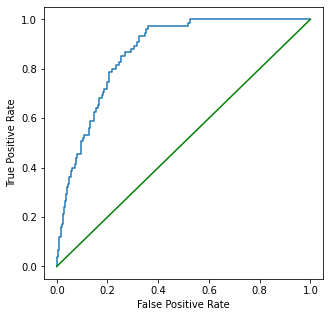

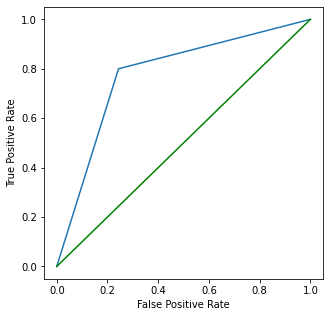

In [237]:
def plot_sklearn_roc_curve(y_real, y_pred):
    fpr, tpr, _ = roc_curve(y_real, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')

# Plots the ROC curve using the sklearn methods - Good plot
y_proba = model_balanced.predict_proba(X_test)
plot_sklearn_roc_curve(y_test, y_proba[:, 1])
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)



## NEARMISS

Distribution before resampling Counter({0: 3403, 1: 174})
Distribution after resampling Counter({0: 174, 1: 174})


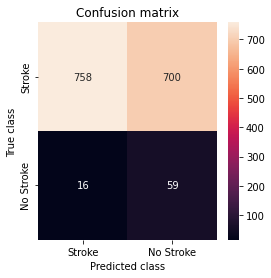

              precision    recall  f1-score   support

           0       0.98      0.52      0.68      1458
           1       0.08      0.79      0.14        75

    accuracy                           0.53      1533
   macro avg       0.53      0.65      0.41      1533
weighted avg       0.94      0.53      0.65      1533



In [238]:
us = NearMiss(n_neighbors=50, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y) 


## SAMPLING

Distribution before resampling Counter({0: 3403, 1: 174})
Distribution labels after resampling Counter({0: 3403, 1: 3403})


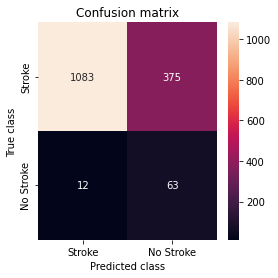

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1458
           1       0.14      0.84      0.25        75

    accuracy                           0.75      1533
   macro avg       0.57      0.79      0.55      1533
weighted avg       0.95      0.75      0.82      1533



In [239]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)
  

## BALANCED BAGGING WITH DESICION TREE

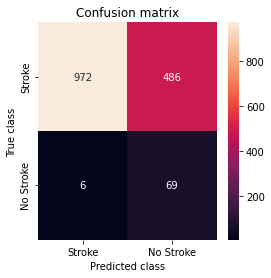

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1458
           1       0.12      0.92      0.22        75

    accuracy                           0.68      1533
   macro avg       0.56      0.79      0.51      1533
weighted avg       0.95      0.68      0.77      1533



In [240]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(random_state=42,base_estimator=DecisionTreeClassifier(random_state=1,max_features=11,max_depth=11,class_weight={1:18,0:1}), n_estimators=2000)
bbc.fit(X_train,y_train) 

pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)

## DECISION TREE CLASSIFIER BASIC

In [241]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9119373776908023

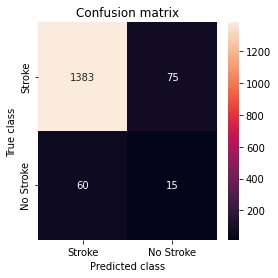

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.17      0.20      0.18        75

    accuracy                           0.91      1533
   macro avg       0.56      0.57      0.57      1533
weighted avg       0.92      0.91      0.92      1533



In [242]:
mostrar_resultados(y_test, y_pred)


## DESICION TREE CLASSIFIER BALANCED

In [243]:
# Create the tree
tree_balance = DecisionTreeClassifier(max_depth=8, class_weight={1:18,0:1})   #
tree_balance.fit(X_train,y_train) 

#create array of probabilities
y_test_predict_proba = tree_balance.predict_proba(X_test)
y_test_predict_proba

y_pred = tree_balance.predict(X_test)
accuracy_score(y_test, y_pred)

tree_balance.get_params()

{'ccp_alpha': 0.0,
 'class_weight': {1: 18, 0: 1},
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

**tree.feature_importances_ is a vector with the estimated importance of each attribute**

In [244]:
for name, importance in zip(df_raw.columns[1:], tree_balance.feature_importances_):
    print(name + ': ' + str(importance))

age: 0.005825336923274533
hypertension: 0.5790829309338804
avg_glucose_level: 0.012047232027276927
bmi: 0.21044348262611912
smoking_status: 0.15564222402218786
stroke: 0.036958793467260984


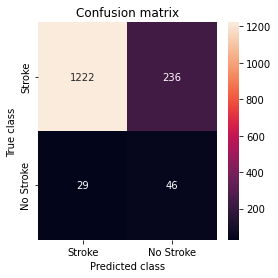

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1458
           1       0.16      0.61      0.26        75

    accuracy                           0.83      1533
   macro avg       0.57      0.73      0.58      1533
weighted avg       0.94      0.83      0.87      1533



In [245]:
mostrar_resultados(y_test, y_pred)


## RANDOMFOREST CLASSIFIER

In [246]:
# Fit a Random Forest model

clf = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight={1:12,0:1})
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9497716894977168

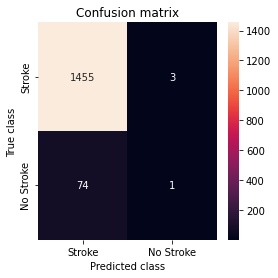

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.25      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.60      0.51      0.50      1533
weighted avg       0.92      0.95      0.93      1533



In [247]:
mostrar_resultados(y_test, y_pred)

## GRADIENT BOOSTING

In [248]:
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9458577951728636

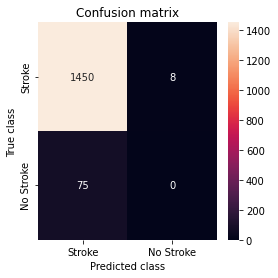

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533



In [249]:
mostrar_resultados(y_test, y_pred)


## Using GridSearchCV

In [250]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [4,8,10,20,30]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[5,20,30,40],
                      min_samples_leaf=[5,10,20,40])

In [251]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=41,class_weight={1:15,0:1}), parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 15},
                                              random_state=41),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 20, 30],
                         'max_features': range(1, 7),
                         'min_samples_leaf': [5, 10, 20, 40],
                         'min_samples_split': [5, 20, 30, 40]})

In [252]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: gini
Best max_depth: 20
Best min_samples_split: 5
Best min_samples_leaf: 5
Best Number Of Components: 1


{'ccp_alpha': 0.0,
 'class_weight': {1: 15, 0: 1},
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 41,
 'splitter': 'best'}

In [253]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=7,                                             
                                    min_samples_split=5,
                                    min_samples_leaf=5,
                                    max_depth = 20,
                                    random_state=0,
                                    class_weight={1:18,0:1})
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))



Score:0.8460534898891063
age: 0.02795973032267054
hypertension: 0.44311233026574603
avg_glucose_level: 0.014605080786855618
bmi: 0.30828243739344324
smoking_status: 0.15895854953853242
stroke: 0.04708187169275211


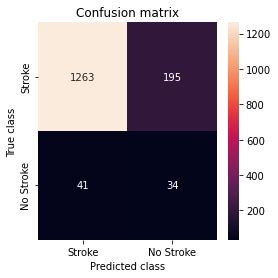

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1458
           1       0.15      0.45      0.22        75

    accuracy                           0.85      1533
   macro avg       0.56      0.66      0.57      1533
weighted avg       0.93      0.85      0.88      1533



In [254]:
y_pred = tree_model.predict(X_test)
mostrar_resultados(y_test, y_pred)


## Using Grid to find the best Weight

In [255]:
# define weight hyperparameter
w = [ {1:18,0:1} ] 
hyperparam_grid = {"class_weight": w , 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [256]:
# define model
lg5 = LogisticRegression(random_state=13,solver='newton-cg', max_iter=500)
# define evaluation procedure
grid = GridSearchCV(lg5,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8386932773109244 with param: {'C': 100, 'class_weight': {1: 18, 0: 1}}


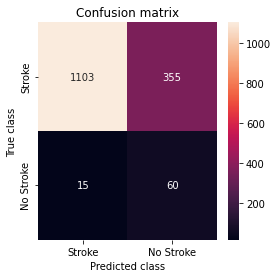

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1458
           1       0.14      0.80      0.24        75

    accuracy                           0.76      1533
   macro avg       0.57      0.78      0.55      1533
weighted avg       0.95      0.76      0.83      1533



In [257]:
lg6 = LogisticRegression(C= 0.01, random_state=13,solver='newton-cg', max_iter=500,class_weight={0: 1, 1: 18})
lg6.fit(X_train,y_train)
y_pred = lg6.predict(X_test)
mostrar_resultados(y_test, y_pred)